<a href="https://colab.research.google.com/github/laurenwisniewski/DS-3001-Project/blob/main/DS_3001_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
! git clone https://github.com/laurenwisniewski/DS-3001-Project

fatal: destination path 'DS-3001-Project' already exists and is not an empty directory.


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
data = pd.read_csv('numerical_data.csv')
data.head()

,age of subject,time spent on online class,time spent on self study,time spent on fitness,time spent on sleep,time spent on social media,time spent on tv,number of meals per day
0,21,2.0,4.0,0.0,7.0,3.0,1,4
1,21,0.0,0.0,2.0,10.0,3.0,0,3
2,20,7.0,3.0,0.0,6.0,2.0,0,3
3,20,3.0,2.0,1.0,6.0,5.0,0,3
4,21,3.0,3.0,1.0,8.0,3.0,1,4


In [80]:
X_health = data.loc[:, ['age of subject', 'time spent on online class', 'time spent on self study', 'time spent on fitness',
                           'time spent on social media', 'number of meals per day'] ]
X_health.dropna()
X_health.corr()

,age of subject,time spent on online class,time spent on self study,time spent on fitness,time spent on social media,number of meals per day
age of subject,1.000000,-0.165156,0.010890,-0.051340,0.068393,-0.028548
time spent on online class,-0.165156,1.000000,0.125465,-0.029550,-0.113606,-0.010063
time spent on self study,0.010890,0.125465,1.000000,0.020240,-0.159582,0.051868
time spent on fitness,-0.051340,-0.029550,0.020240,1.000000,-0.061322,0.134726
time spent on social media,0.068393,-0.113606,-0.159582,-0.061322,1.000000,0.026364
number of meals per day,-0.028548,-0.010063,0.051868,0.134726,0.026364,1.000000


In [81]:
## A PCA Decomposition of Housing Variables:

def demean(x):
    xbar = np.mean(x)
    z = x-xbar
    return(z)
Z_health = X_health.apply(demean) # Z is the demeaned X
X_mean = X_health.mean().to_numpy() # Compute variable averages

# Step 1: Compute correlation matrix
C_health = Z_health.cov()

# Step 2: Eigen decomposition and rank by eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(C_health) # Perform eigenvalue decomposition

eig_val = eigenvalues[ np.argsort(-eigenvalues) ]
eig_vect = eigenvectors[ :, np.argsort(-eigenvalues) ]
x_means = X_mean[ np.argsort(-eigenvalues) ]
eig_val = eig_val/np.sum(eig_val)
eig_vect = eig_vect #/np.sum(eig_vect,axis = 1)
print('Sorted Eigenvalues: ', eig_val, '\n')
print('Sorted Eigenvectors: ', eig_vect, '\n')

# Step 3: Compute Feature Matrix
L = 3 # Number of principal components to use
components = eig_vect[:,0:L]
x_means = x_means[:L]

# Step 4: Transform Variables
transformed = Z_health @ components +x_means # Multiple original data times the principal componenet filter, plus the mean

print('Dimensions of final data: ', transformed.shape) # Dimension reduction!


Sorted Eigenvalues:  [0.6985235  0.12075346 0.08780681 0.06520954 0.01644104 0.01126565] 

Sorted Eigenvectors:  [[-0.99698436  0.04500733  0.06076164 -0.01466998  0.00815587 -0.00477806]
 [ 0.07291562  0.53858506  0.82756444  0.138753    0.01688369 -0.01445975]
 [-0.00277592  0.78350535 -0.55556144  0.27677001 -0.02897681 -0.00467402]
 [ 0.00681875  0.00342687 -0.02198588 -0.028838    0.38672103 -0.92145189]
 [-0.02515607 -0.30644425  0.04194052  0.9499178  -0.00881816 -0.03575626]
 [ 0.00429835  0.01000056 -0.02354191  0.02748286  0.92150846  0.38651538]] 

Dimensions of final data:  (1115, 3)


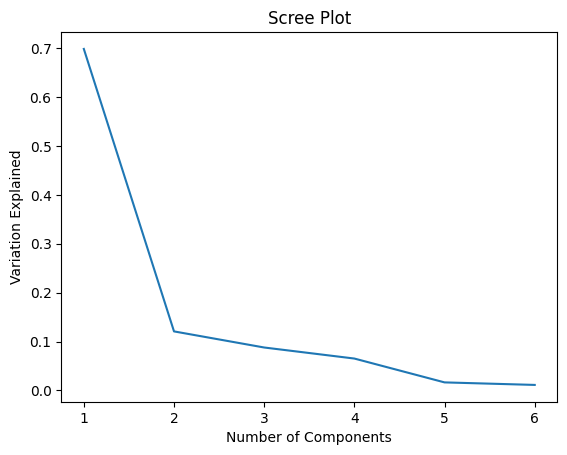

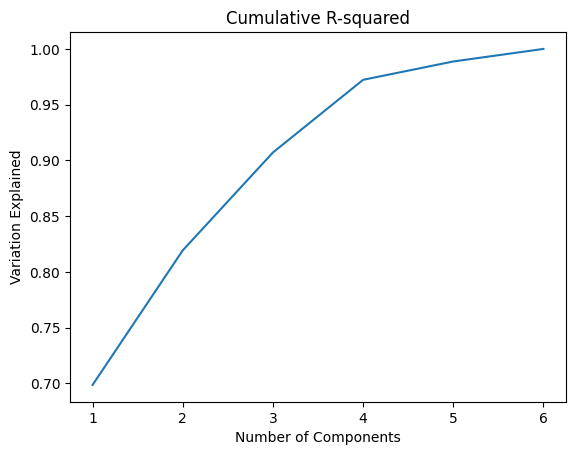

In [82]:
# Scree plot:
x = np.linspace(1, Z_health.shape[1],Z_health.shape[1])
y = eig_val
plt.plot(x,y)
plt.xlabel("Number of Components")
plt.ylabel("Variation Explained")
plt.title('Scree Plot')
plt.show()

# R^2 plot:
x = np.linspace(1, Z_health.shape[1],Z_health.shape[1])
y = np.cumsum(eig_val)
plt.plot(x,y)
plt.xlabel("Number of Components")
plt.ylabel("Variation Explained")
plt.title('Cumulative R-squared')
plt.show()

In [84]:
## Extract first principal component:
L = 1 # Number of principal components to use
components = eig_vect[:,0:L]
x_means = x_means[:L]
transformed = Z_health @ components +x_means
data['pc1'] = transformed
data.head()

,age of subject,time spent on online class,time spent on self study,time spent on fitness,time spent on sleep,time spent on social media,time spent on tv,number of meals per day,pc1
0,21,2.0,4.0,0.0,7.0,3.0,1,4,19.187673
1,21,0.0,0.0,2.0,10.0,3.0,0,3,19.062285
2,20,7.0,3.0,0.0,6.0,2.0,0,3,20.572869
3,20,3.0,2.0,1.0,6.0,5.0,0,3,20.215333
4,21,3.0,3.0,1.0,8.0,3.0,1,4,19.270183


In [85]:
from sklearn.linear_model import LinearRegression

X = data.loc[:,['age of subject', 'time spent on online class', 'time spent on self study', 'time spent on fitness', 'time spent on social media']]
y = data['time spent on sleep']

reg = LinearRegression().fit(X,y)
print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print(reg.score(X, y)) # R squared measure

9.629424083039728
[-0.04378691 -0.14304269 -0.13445684 -0.0953128   0.02056576]
0.09257560466727388
